# **LIBRERÍAS**

In [ ]:
#Importar librerías
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns

In [ ]:
#Cargar el dataset
def cargaDatos():
  global df
  df = pd.read_csv('https://query.data.world/s/hemljxoec4fnxuefoccoywvohivnla')
  df.head()
  return

cargaDatos()

#Verificar y limpieza de datos

In [ ]:
def verificarNulos():
  #Compruebo si faltan datos
  return df.isnull().sum().sort_values(ascending=False)

verificarNulos()

Outcome Subtype     52087
Name                29429
Outcome Type            7
Age upon Outcome        4
Sex upon Outcome        2
Animal ID               0
DateTime                0
MonthYear               0
Date of Birth           0
Animal Type             0
Breed                   0
Color                   0
dtype: int64

In [ ]:
#Describimos los datos, de esta manera podemos obtener el valor que mas se repite en cada columna
df.describe(include=[np.object])

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,95367,65938,95367,95367,95367,95360,43280,95367,95365,95363,95367,95367
unique,85672,16383,78742,78742,6312,9,20,5,5,48,2348,567
top,A721033,Bella,04/18/2016 12:00:00 AM,04/18/2016 12:00:00 AM,09/01/2015,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,24,419,39,39,118,41332,23549,54327,33767,17559,28334,9914


In [ ]:
def imputacion():
  #Imputación
  #Reemplazamos los datos faltantes con los valores que más se repiten
  df['Name'].replace(np.nan, 'Bella', inplace = True)
  df['Outcome Type'].replace(np.nan, 'Adoption	', inplace = True)
  df['Outcome Subtype'].replace(np.nan, 'Partner', inplace = True)
  df['Sex upon Outcome'].replace(np.nan, 'Neutered Male', inplace = True)
  df['Age upon Outcome'].replace(np.nan, '1 year', inplace = True)
  return df.head()

imputacion()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A771830,*Bradley,12/27/2018 01:25:00 PM,12/27/2018 01:25:00 PM,05/10/2017,Adoption,Foster,Dog,Neutered Male,1 year,Pit Bull Mix,White/Blue
1,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,Adoption,Partner,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Brown Tabby
2,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,Partner,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
3,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,Partner,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
4,A721285,Bella,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray


In [ ]:
#Verifico
verificarNulos()

Animal ID           0
Name                0
DateTime            0
MonthYear           0
Date of Birth       0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

In [ ]:
#Verifico que valores se encuentran en la columna Age upon Outcome
df['Age upon Outcome'].unique()

array(['1 year', '5 months', '10 months', '5 years', '2 years', '1 month',
       '3 years', '8 months', '3 weeks', '9 years', '2 weeks', '4 months',
       '2 months', '6 years', '10 years', '13 years', '4 years',
       '6 months', '3 months', '11 years', '1 week', '9 months',
       '4 weeks', '11 months', '8 years', '7 years', '12 years',
       '7 months', '1 weeks', '3 days', '5 days', '14 years', '2 days',
       '5 weeks', '4 days', '15 years', '16 years', '17 years', '6 days',
       '1 day', '18 years', '0 years', '24 years', '19 years', '20 years',
       '22 years', '25 years', '-1 years'], dtype=object)

In [ ]:
#Busco las filas que contengan -1 years
def buscam1():
  return df.loc[df.loc[:, 'Age upon Outcome'] == '-1 years']
  
buscam1()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
89541,A753893,Chato,07/02/2015 11:06:00 AM,07/02/2015 11:06:00 AM,07/12/2016,Transfer,Partner,Dog,Intact Male,-1 years,American Bulldog Mix,White/Brown


In [ ]:
#Borro esa fila
df = df.drop([89541])

#Compruebo que se borró
buscam1()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color


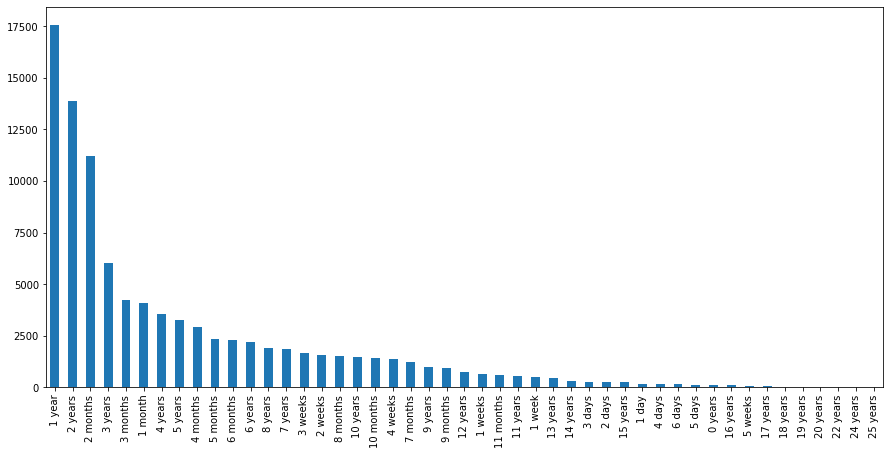

In [ ]:
#Ahora verifico mi salida
def graficarFrecY():
  plt.figure(figsize=(15,7))
  freq = df['Age upon Outcome'].value_counts().plot(kind="bar")
  return freq

graficarFrecY()

In [ ]:
df['Age upon Outcome'].value_counts()

1 year       17563
2 years      13897
2 months     11215
3 years       6047
3 months      4245
1 month       4102
4 years       3581
5 years       3257
4 months      2944
5 months      2366
6 months      2302
6 years       2182
8 years       1888
7 years       1866
3 weeks       1668
2 weeks       1570
8 months      1517
10 years      1454
10 months     1433
4 weeks       1392
7 months      1222
9 years       1011
9 months       936
12 years       729
1 weeks        630
11 months      614
11 years       548
1 week         500
13 years       460
14 years       303
3 days         279
2 days         263
15 years       262
1 day          187
4 days         175
6 days         166
5 days         131
0 years        118
16 years       117
5 weeks         81
17 years        66
18 years        39
19 years        19
20 years        15
22 years         4
24 years         1
25 years         1
Name: Age upon Outcome, dtype: int64

In [ ]:
xi = ['22 y','25 y','24 y','20 y','19 y','18 y','17 y','16 y','15 y','14 y','13 y','12 y','11 y','10 y','9 y',
      '8 y','7 y','6 y','5 y','4 y','3 y','2 y','1 y','11 m','10 m','9 m','8 m','7 m','6 m','5 m','4 m','3 m',
      '2 m','1 m','5 w','4 w','3 w','2 w','1 w','1 w','6 d','5 d','4 d','3 d','2 d','1 d','0 y']
      
yi=[4,1,1,15,19,39,66,117,262,303,460,729,548,1454,1011,1888,1866,2182,3257,3581,6047,13897,17563,614,1433,936,
    1517,1222,2302,2366,2944,4245,11215,4102,81,1392,1668,1570,630,500,166,131,175,279,263,187,118]

<Figure size 7200x4320 with 0 Axes>

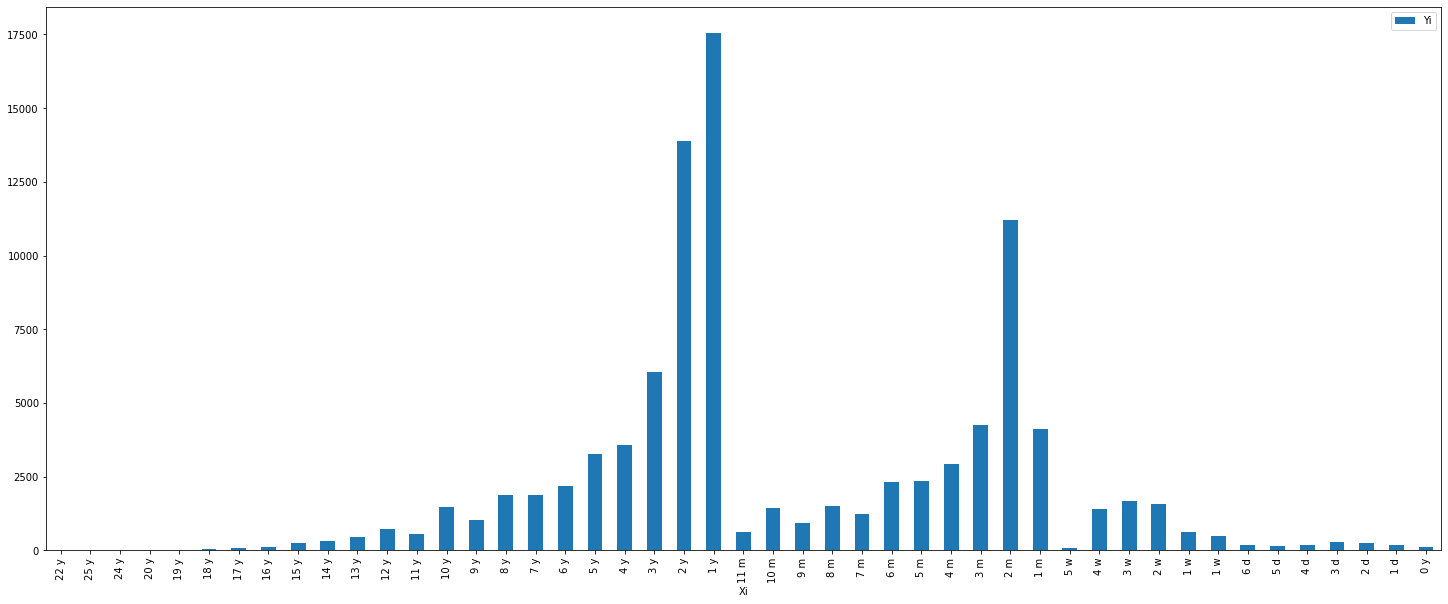

In [ ]:
#Grafico las salidas de forma ordenada 
plt.figure(figsize=(100,60))
dfg = pd.DataFrame()
dfg['Xi'] = xi
dfg['Yi'] = yi

dfg.plot.bar(x="Xi", y="Yi",figsize=(25,10))

In [ ]:
#Reducir clases
def imputacionY ():
  df['Age upon Outcome'] = df['Age upon Outcome'].replace(['1 day','2 days','3 days','4 days','5 days','6 days','1 week','1 weeks','2 weeks','3 weeks','4 weeks','5 weeks',
                                                             '1 month','2 months','3 months','4 months','5 months','6 months','0 years','7 months','8 months','9 months','10 months',
                                                             '11 months','1 year'],'0 to 1 year')
  
  df['Age upon Outcome'] = df['Age upon Outcome'].replace(['17 years','13 years','14 years','15 years','16 years','18 years','19 years','20 years','22 years','24 years','25 years',
                                                             '3 years','4 years','5 years','6 years','7 years','8 years','18 years','9 years','10 years','11 years','12 years','2 years'],'1 or more years')
  
imputacionY()

In [ ]:
#Cuento los datos en cada clase
freq = df['Age upon Outcome'].value_counts() 
freq
dff = pd.DataFrame(freq)
dff 

,Age upon Outcome
0 to 1 year,57619
1 or more years,37747


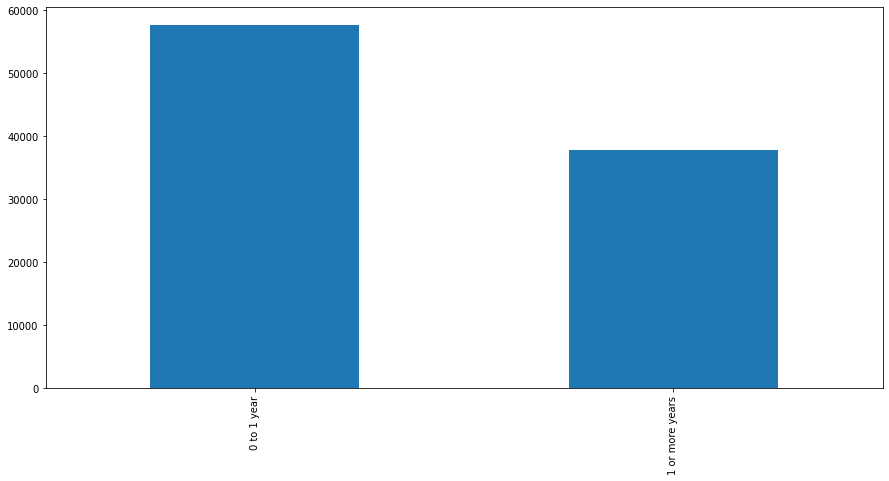

In [ ]:
#Verifico nuevamente
graficarFrecY()

#Ingeniería de características

#Estandarización

In [ ]:
#Agrego columna extra para tener solo el color principal de la mascota
df['Main Color']=0

def agregaColorPrin():
  for i in df.index :
    global txt_tmp 
    txt_tmp = df['Color'][i].split('/')
    df['Main Color'][i]=txt_tmp[0]

agregaColorPrin()

df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Main Color
0,A771830,*Bradley,12/27/2018 01:25:00 PM,12/27/2018 01:25:00 PM,05/10/2017,Adoption,Foster,Dog,Neutered Male,0 to 1 year,Pit Bull Mix,White/Blue,White
1,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,Adoption,Partner,Cat,Neutered Male,0 to 1 year,Domestic Shorthair Mix,Brown Tabby,Brown Tabby
2,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,Partner,Cat,Spayed Female,0 to 1 year,Domestic Shorthair Mix,Calico,Calico
3,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,Partner,Dog,Neutered Male,1 or more years,Border Terrier Mix,Tan,Tan
4,A721285,Bella,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,1 or more years,Raccoon Mix,Black/Gray,Black


#One Hot Encoding

In [ ]:
#Reviso las clases de la característica
df['Sex upon Outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Unknown', 'Intact Female',
       'Intact Male'], dtype=object)

In [ ]:
#Aplico One Hot Encoding
def oneOH():
  dfaux = pd.get_dummies(df, columns=["Sex upon Outcome"], prefix="O_H", drop_first=False)
  dfaux.head()
  return dfaux

df = oneOH()

In [ ]:
#Reordeno
df = pd.concat([df.iloc[:,5:8],df.iloc[:,9:10],df.iloc[:,11:],df.iloc[:,8:9]], axis=1)
df.head()

,Outcome Type,Outcome Subtype,Animal Type,Breed,Main Color,O_H_Intact Female,O_H_Intact Male,O_H_Neutered Male,O_H_Spayed Female,O_H_Unknown,Age upon Outcome
0,Adoption,Foster,Dog,Pit Bull Mix,White,0,0,1,0,0,0 to 1 year
1,Adoption,Partner,Cat,Domestic Shorthair Mix,Brown Tabby,0,0,1,0,0,0 to 1 year
2,Adoption,Partner,Cat,Domestic Shorthair Mix,Calico,0,0,0,1,0,0 to 1 year
3,Return to Owner,Partner,Dog,Border Terrier Mix,Tan,0,0,1,0,0,1 or more years
4,Euthanasia,Suffering,Other,Raccoon Mix,Black,0,0,0,0,1,1 or more years


#Label Encoding

In [ ]:
def labelEnd():
  bridge_types = df['Outcome Type']
  bridge_df = pd.DataFrame(bridge_types, columns=['Outcome Type'])
  # convertir el tipo de columnas a 'categoría'
  bridge_df['Outcome Type'] = bridge_df['Outcome Type'].astype('category')
  # Asignación de valores numéricos y almacenamiento en otra columna
  df['Outcome Type'] = bridge_df['Outcome Type'].cat.codes
  
  bridge_types = df['Outcome Subtype']
  bridge_df = pd.DataFrame(bridge_types, columns=['Outcome Subtype'])
  bridge_df['Outcome Subtype'] = bridge_df['Outcome Subtype'].astype('category')
  df['Outcome Subtype'] = bridge_df['Outcome Subtype'].cat.codes
  
  bridge_types = df['Animal Type']
  bridge_df = pd.DataFrame(bridge_types, columns=['Animal Type'])
  bridge_df['Animal Type'] = bridge_df['Animal Type'].astype('category')
  df['Animal Type'] = bridge_df['Animal Type'].cat.codes

  bridge_types = df['Breed']
  bridge_df = pd.DataFrame(bridge_types, columns=['Breed'])
  bridge_df['Breed'] = bridge_df['Breed'].astype('category')
  df['Breed'] = bridge_df['Breed'].cat.codes

  bridge_types = df['Main Color']
  bridge_df = pd.DataFrame(bridge_types, columns=['Main Color'])
  bridge_df['Main Color'] = bridge_df['Main Color'].astype('category')
  df['Main Color'] = bridge_df['Main Color'].cat.codes
  
  return df

labelEnd().head()

,Outcome Type,Outcome Subtype,Animal Type,Breed,Main Color,O_H_Intact Female,O_H_Intact Male,O_H_Neutered Male,O_H_Spayed Female,O_H_Unknown,Age upon Outcome
0,0,7,2,1780,55,0,0,1,0,0,0 to 1 year
1,0,13,1,1036,18,0,0,1,0,0,0 to 1 year
2,0,13,1,1036,21,0,0,0,1,0,0 to 1 year
3,7,13,2,459,50,0,0,1,0,0,1 or more years
4,4,18,4,1944,2,0,0,0,0,1,1 or more years


In [ ]:
#Estandarización
def estandarizar():
  datos2 = df.drop('Age upon Outcome' ,axis=1)
  df_new = (datos2-datos2.mean())/datos2.std()
  auxi=pd.concat([df_new.iloc[:,:],df.iloc[:,-1]], axis=1)
  return auxi

df = estandarizar()

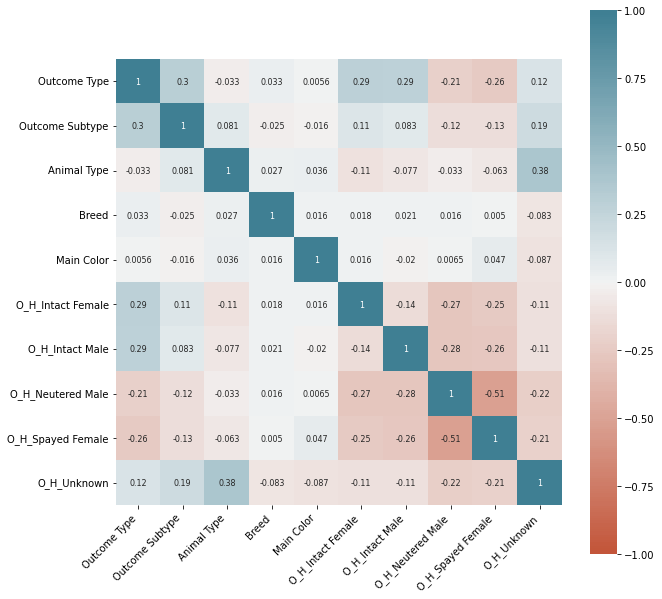

In [ ]:
#Grafico mapa de calor de todas las caracteristicas
def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64']).corr(method='pearson')

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(
    corr_matrix,
    annot     = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
#Divido los datos en test y entrenamiento
datos = df
from sklearn.model_selection import train_test_split
X = datos.drop('Age upon Outcome', axis=1)
y = datos['Age upon Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.30, 
                                                   random_state=50337)
y_test = y_test.map({'0 to 1 year': 1, '1 or more years': 0}).astype(int)
y_train = y_train.map({'0 to 1 year': 1, '1 or more years': 0}).astype(int)

In [ ]:
#RANDOM FOREST
RF = RandomForestClassifier(max_depth=12, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

rdf = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

rdf.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
rdf.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
rdf.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
rdf.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
rdf.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
rdf.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
rdf.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
rdf.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(rdf)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.733417
Test Accuracy,0.713981
Top 1 Feature Predictor,Outcome Type
Top 2 Feature Predictor,Breed
Top 3 Feature Predictor,Animal Type
Top 4 Feature Predictor,Main Color
Top 5 Feature Predictor,Outcome Subtype


In [ ]:
def calcularMetricas():  
  global dfMetricas
  # Exactitud del modelo: ¿con qué frecuencia es correcto el clasificador?
  exactitud = metrics.accuracy_score(y_test, y_pred_RF)
  print("Accuracy:",exactitud)
  # Precisión del modelo: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
  presicion = metrics.precision_score(y_test, y_pred_RF)
  print("Presicion:",presicion)
  # Sensibilidad del modelo: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
  sensibilidad = metrics.recall_score(y_test, y_pred_RF)
  print("Recall:",sensibilidad)
  datos = {
    'Métrica' : ['Accuracy', 'Presicion', 'Recall'],
    'Porcentaje': [exactitud, presicion, sensibilidad]
    }
  dfMetricas = pd.DataFrame(datos)

calcularMetricas()

Accuracy: 0.7139811254806012
Presicion: 0.7295028401950435
Recall: 0.8381656462977937


In [ ]:
GRÁFICA DE LAS MÉTRICAS DE RENDIMIENTO

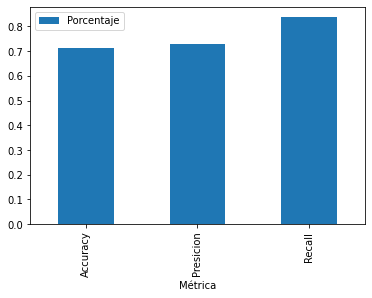

In [ ]:
#Grafico las metricas
dfMetricas.plot(x='Métrica',y='Porcentaje',kind = 'bar')

In [ ]:
#Exportar dataset
def exportaDataframe():
  datos.to_csv('dataset.csv')
  datos.to_csv('dataset.csv', index=False)
  datos.to_csv('dataset.csv', encoding='utf-8')

exportaDataframe()

CARACTERÍSTICAS ARROJADAS CON RANDOM FOREST

In [ ]:
#Elimino las características
dataFrameFinal = pd.concat([datos.iloc[:,:5], datos.iloc[:,-1]], axis=1)
dataFrameFinal

,Outcome Type,Outcome Subtype,Animal Type,Breed,Main Color,Age upon Outcome
0,-1.071641,-2.460884,0.379433,1.222812,1.482128,0 to 1 year
1,-1.071641,0.098777,-0.997155,-0.198440,-0.352406,0 to 1 year
2,-1.071641,0.098777,-0.997155,-0.198440,-0.203660,0 to 1 year
3,0.679376,0.098777,0.379433,-1.300675,1.234218,1 or more years
4,-0.071060,2.231828,3.132608,1.536099,-1.145718,1 or more years
...,...,...,...,...,...,...
95362,0.679376,0.098777,0.379433,-0.261480,-1.145718,0 to 1 year
95363,0.679376,0.098777,0.379433,0.004050,-1.145718,0 to 1 year
95364,0.679376,0.098777,0.379433,1.453957,1.234218,1 or more years
95365,-1.071641,0.098777,-0.997155,1.826463,1.035890,1 or more years


In [ ]:
datos  = dataFrameFinal
from sklearn.model_selection import train_test_split
X = datos.drop('Age upon Outcome', axis=1)
y = datos['Age upon Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.30, 
                                                    random_state=50337)
y_test = y_test.map({'0 to 1 year': 1, '1 or more years': 0}).astype(int)
y_train = y_train.map({'0 to 1 year': 1, '1 or more years': 0}).astype(int)

#RANDOM FOREST
RF = RandomForestClassifier(max_depth=12, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

rdf = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

rdf.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
rdf.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
rdf.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
rdf.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
rdf.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
rdf.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
rdf.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
rdf.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(rdf)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.725133
Test Accuracy,0.702377
Top 1 Feature Predictor,Outcome Type
Top 2 Feature Predictor,Breed
Top 3 Feature Predictor,Animal Type
Top 4 Feature Predictor,Main Color
Top 5 Feature Predictor,Outcome Subtype


In [ ]:
#Calculo Metricas
calcularMetricas()

Accuracy: 0.7023767913317022
Presicion: 0.719196851178317
Recall: 0.8337183781910592


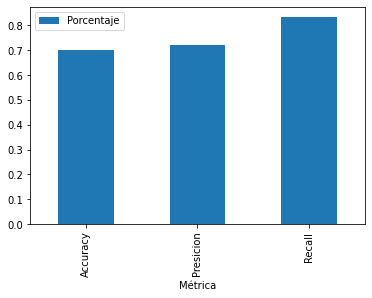

In [ ]:
#Grafico las metricas
dfMetricas.plot(x='Métrica',y='Porcentaje',kind = 'bar')

Grafica comparativa de la exactitud (Accuracy)

In [ ]:
def comparaPresicion():  
  global dfPres
  datos = {
    'Accuracy' : ['Random Forest', 'SVM Polinómico', 'SVM Lineal'],
    'Porcentaje': [0.7331002331002331, 0.7137224358662319, 0.6976227610000473]
    }
  dfPres = pd.DataFrame(datos)

comparaPresicion()

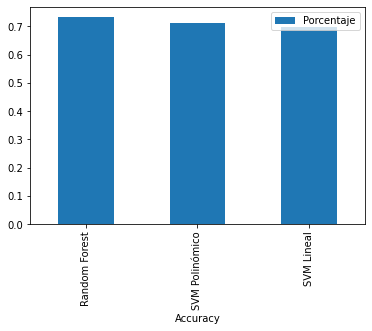

In [ ]:
#Grafico las metricas
dfPres.plot(x='Accuracy',y='Porcentaje',kind = 'bar')